## Importando base de dados

In [86]:
import pandas as pd

In [87]:
dados = pd.read_csv('data/tips.csv')

In [88]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Tradução

In [89]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [90]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [91]:
type(dados)

pandas.core.frame.DataFrame

In [92]:
gorjetas = dados.rename(columns = renomear)

In [93]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [94]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [95]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [96]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [97]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [98]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [99]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [100]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [101]:
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [102]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [103]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [104]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [105]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [106]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [107]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


## Importando o Seaborn

In [108]:
import seaborn as sns

## Análise I - Valor da conta e gorjeta

In [109]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

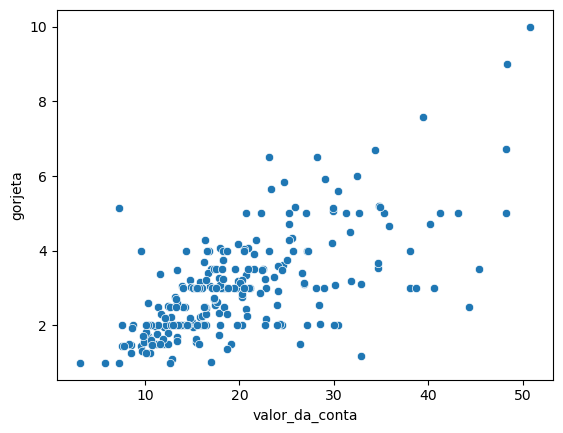

In [110]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

#### Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [111]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [112]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [113]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [114]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [115]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

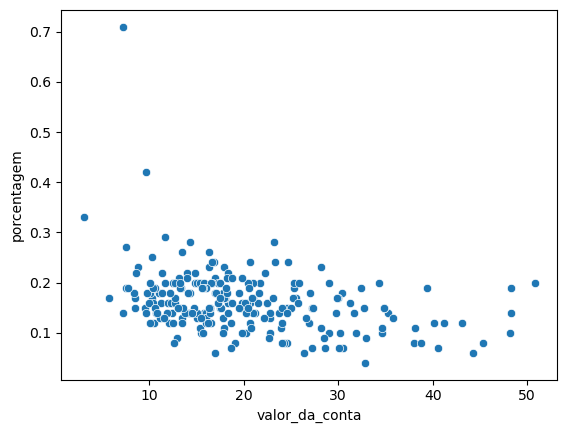

In [116]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas )

#### Visualmente, o valor da conta não é proporcional ao valor da gorjeta

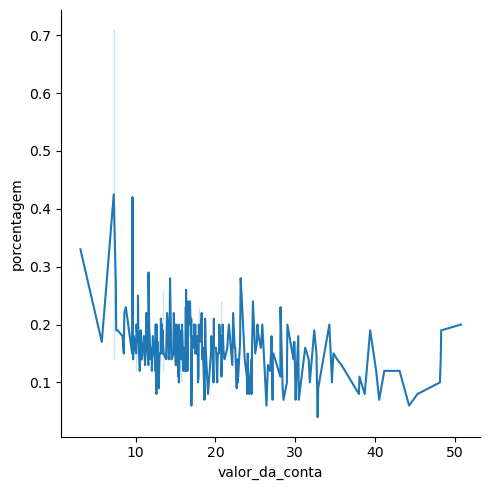

In [117]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

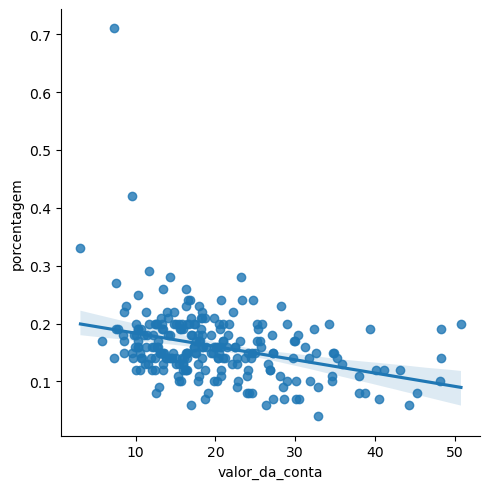

In [118]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [119]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [120]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [121]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


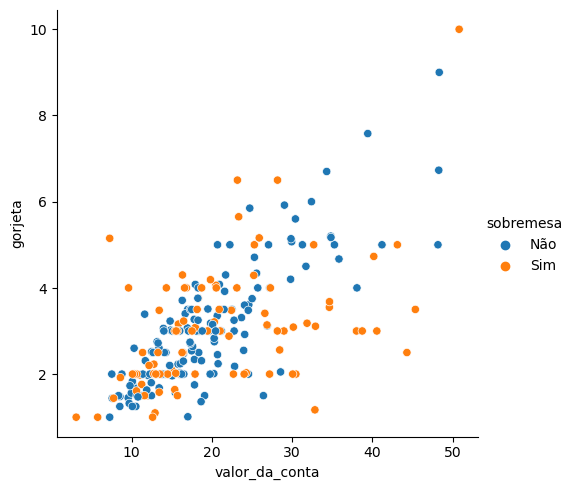

In [122]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

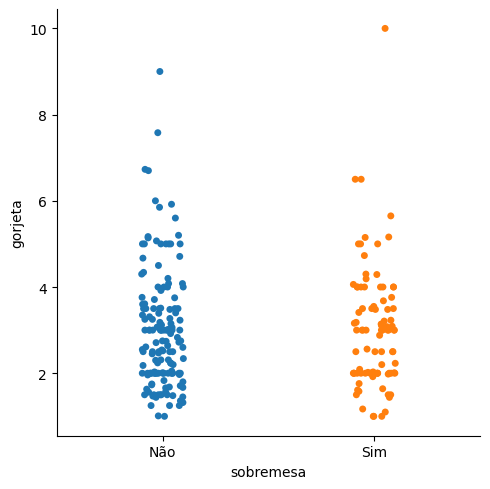

In [123]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

#### Visualmente, parece que temos poucas diferenças de quem pediu a sobremesa e de quem não pediu a sobremesa

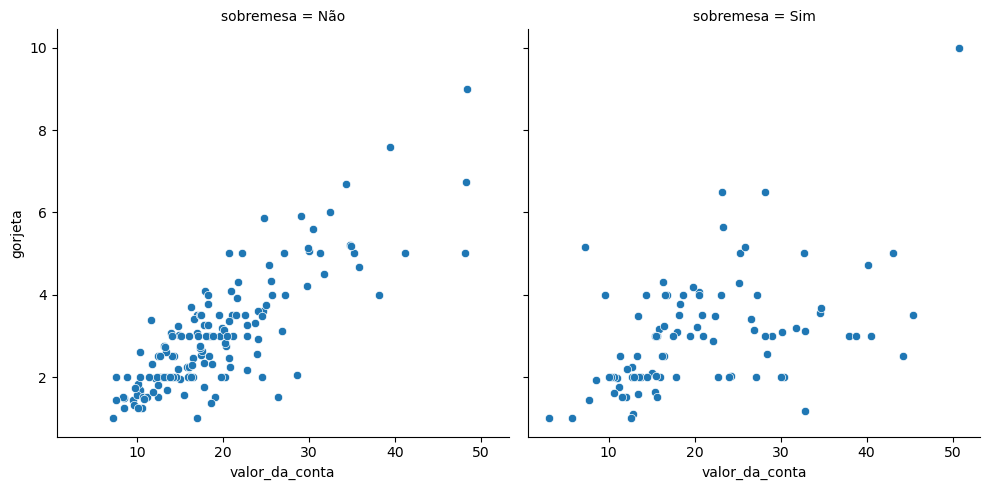

In [124]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)

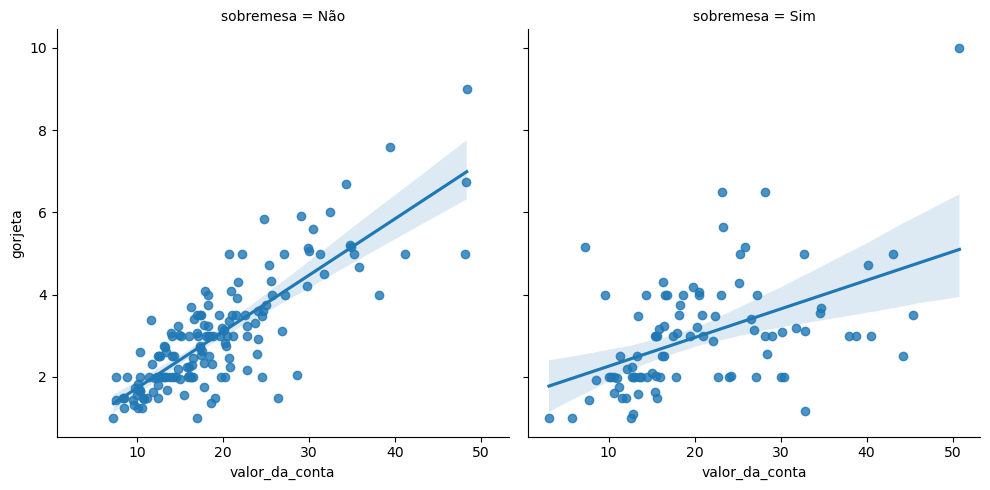

In [125]:
sns.lmplot(x ='valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)

#### Visualmente, a distribuição apresenta poucas diferenças

## Análise II - Sobremesa

In [126]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [127]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [128]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


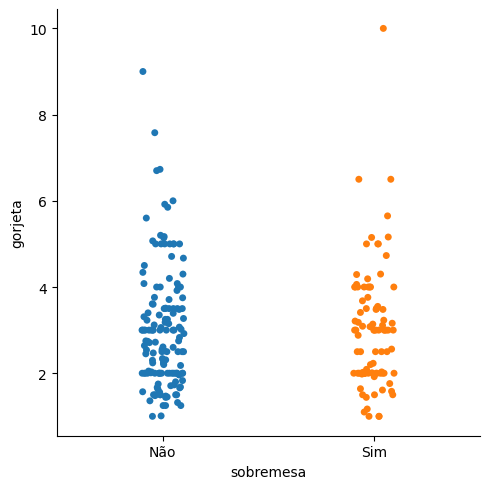

In [129]:
sns.catplot(x = 'sobremesa', y = 'gorjeta',data = gorjetas)

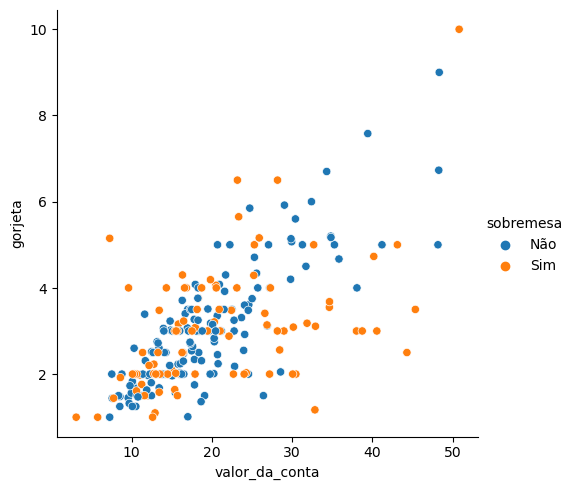

In [130]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', data = gorjetas)

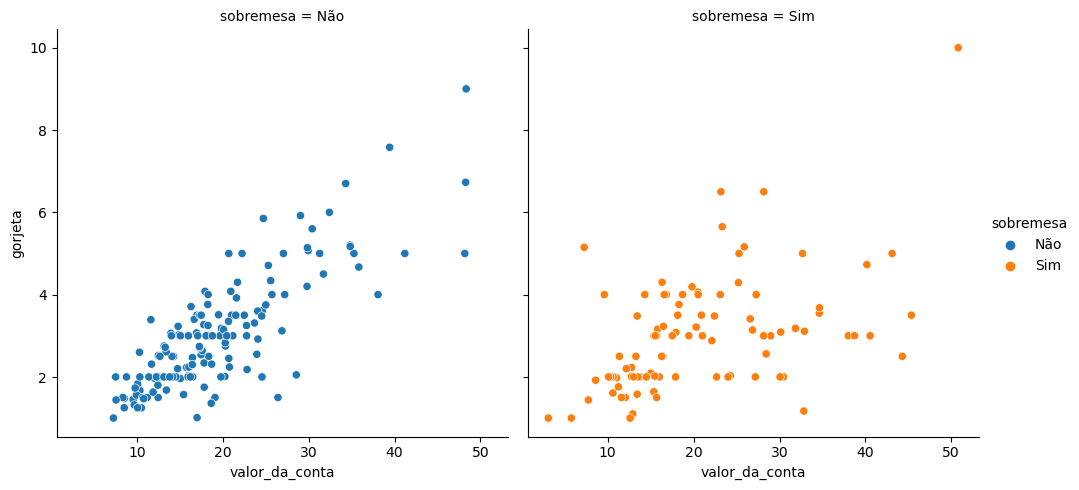

In [131]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'sobremesa', col = 'sobremesa', data = gorjetas)

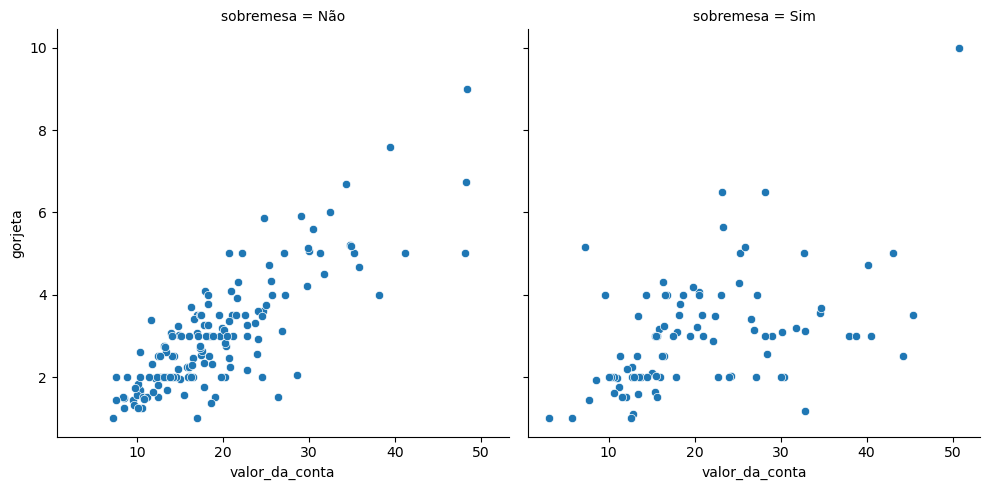

In [132]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', data = gorjetas)

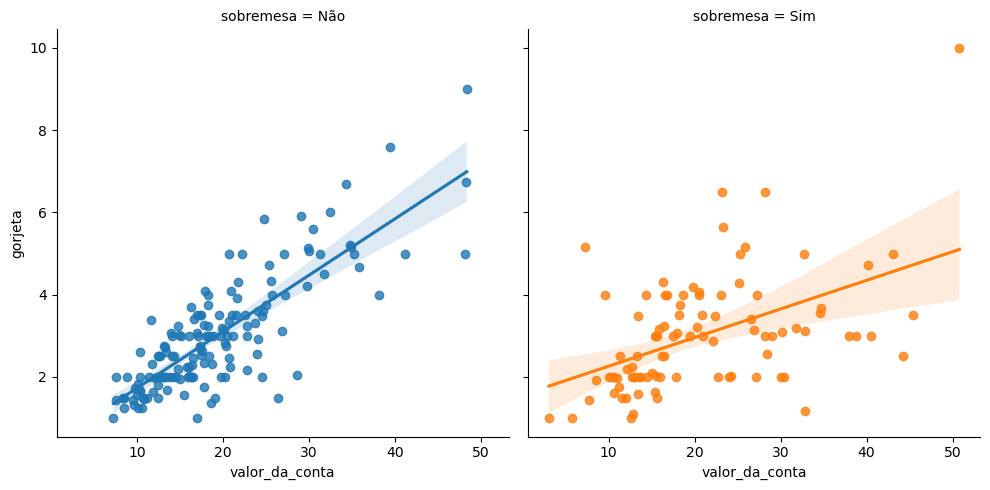

In [133]:
sns.lmplot(x = 'valor_da_conta', y = 'gorjeta', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

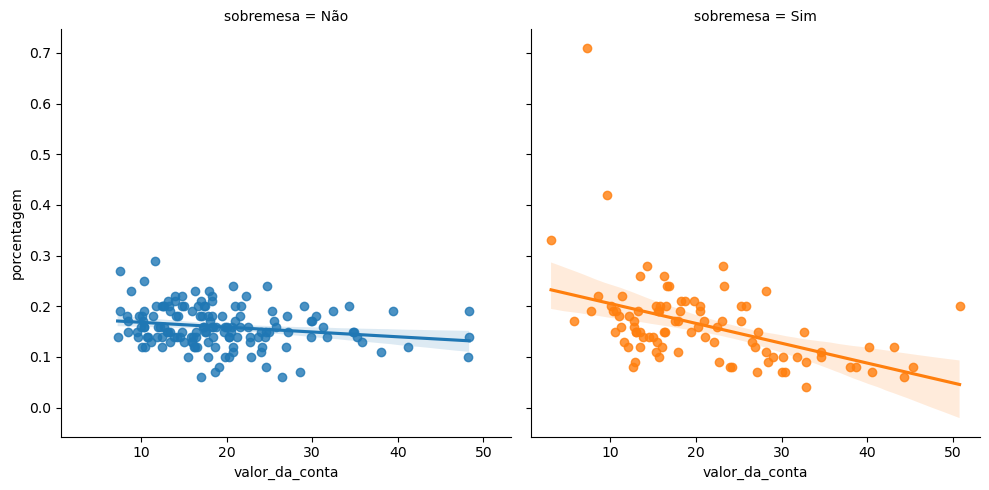

In [134]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', data = gorjetas)

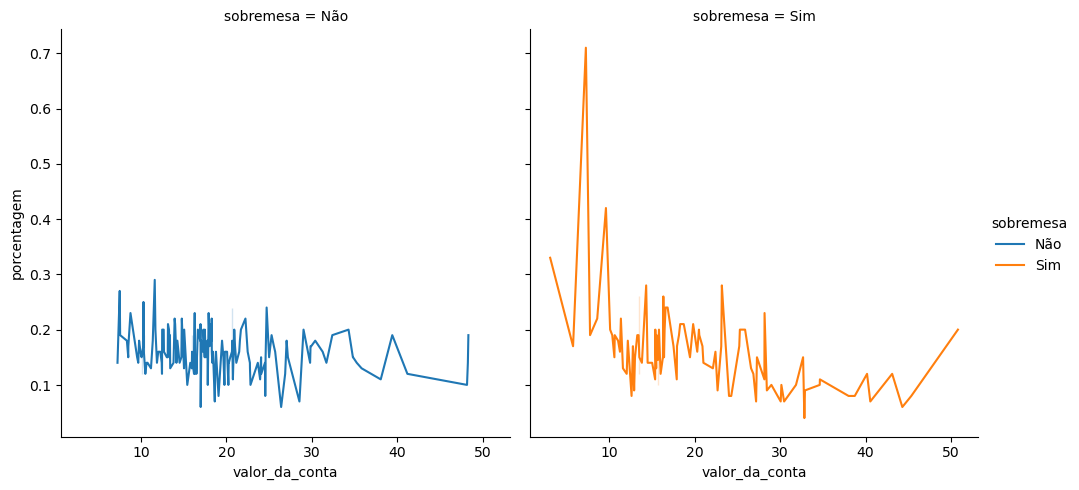

In [135]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', col = 'sobremesa', hue = 'sobremesa', kind = 'line', data = gorjetas)

#### Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

## Teste de hipótese

#### A distribuição da taxa da gorjeta é a mesma nos dois grupos

#### A distribuição da taxa da gorjeta não é a mesma nos dois grupos

In [136]:
from scipy.stats import ranksums

In [137]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [138]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [139]:
r = ranksums(sobremesa, sem_sobremesa)

In [140]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


#### A distribuição da taxa da gorjeta é a mesma nos dois grupos

## Análise III - Dia da semana

In [141]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [142]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

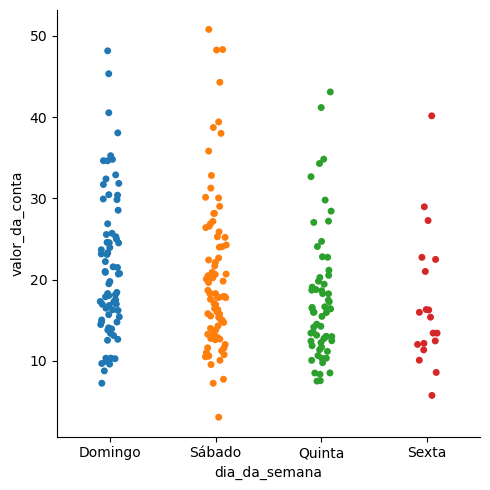

In [143]:
sns.catplot(x = 'dia_da_semana', y = 'valor_da_conta', data = gorjetas)

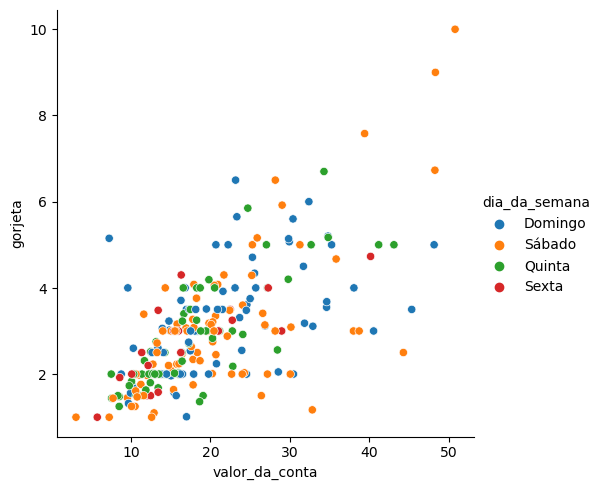

In [144]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', data = gorjetas)

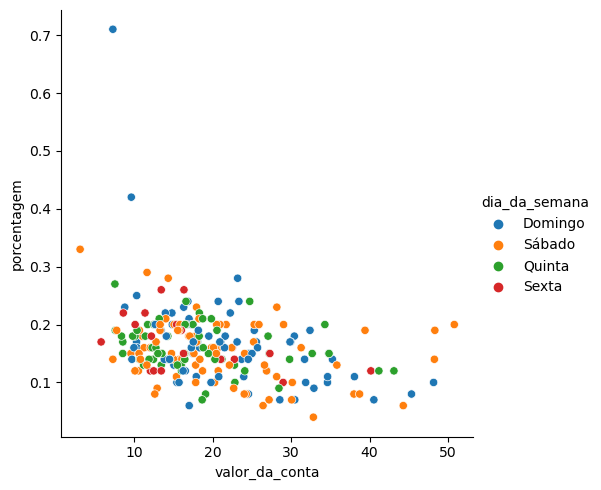

In [145]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', data = gorjetas)

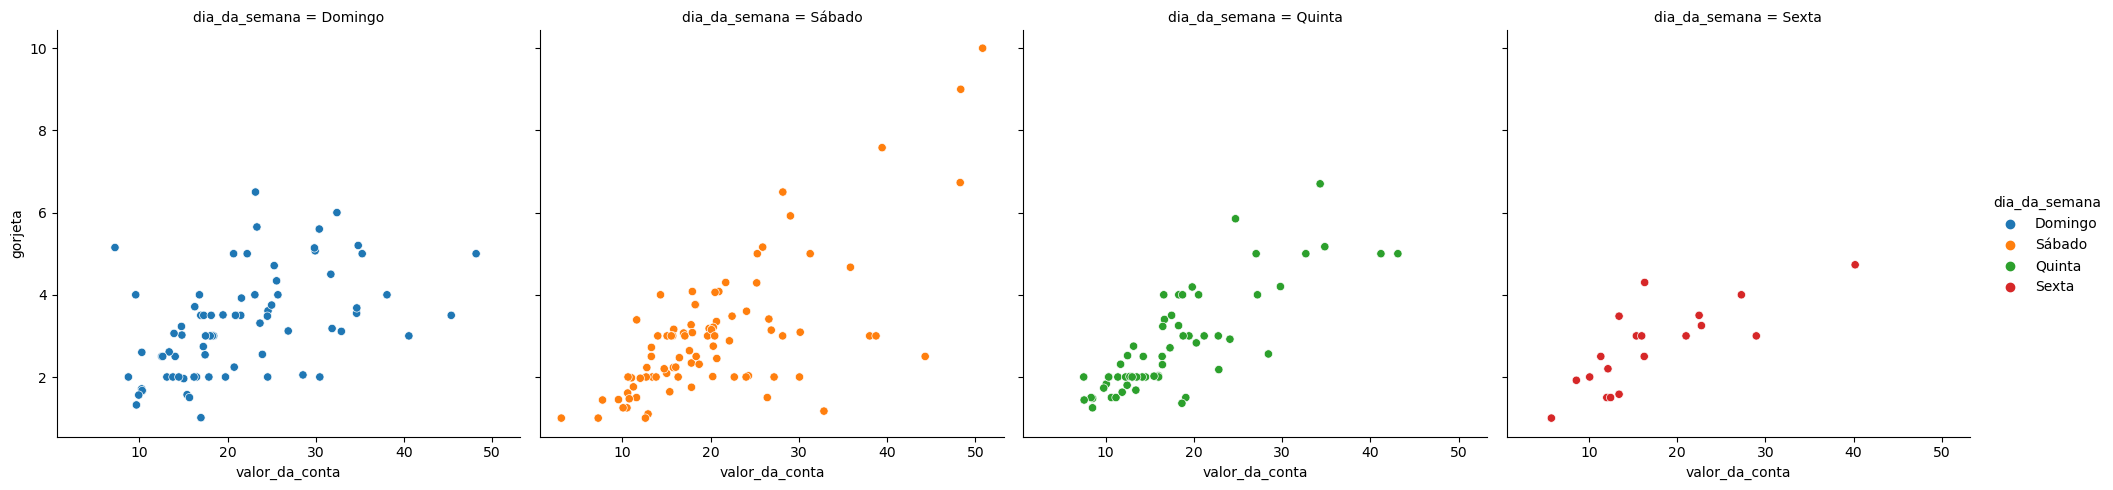

In [146]:
sns.relplot(x = 'valor_da_conta', y = 'gorjeta', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

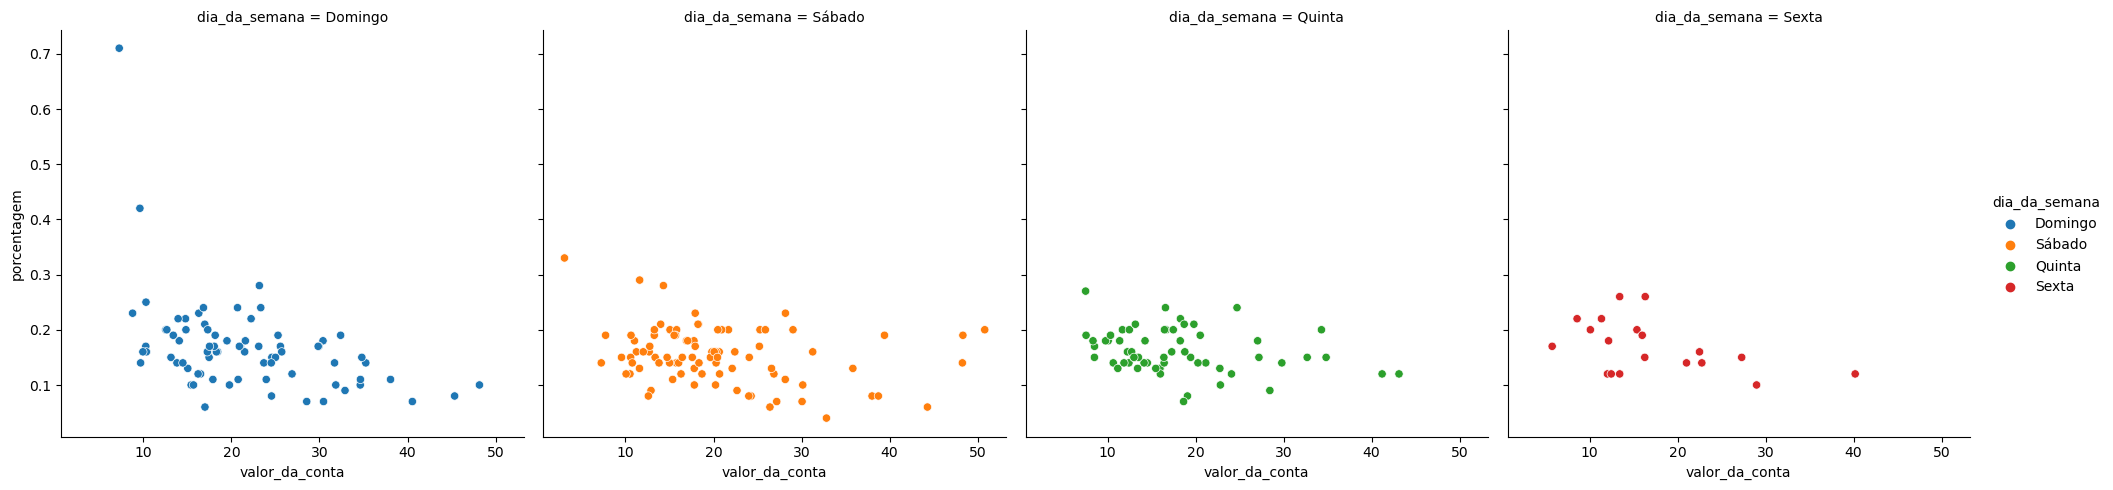

In [147]:
sns.relplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

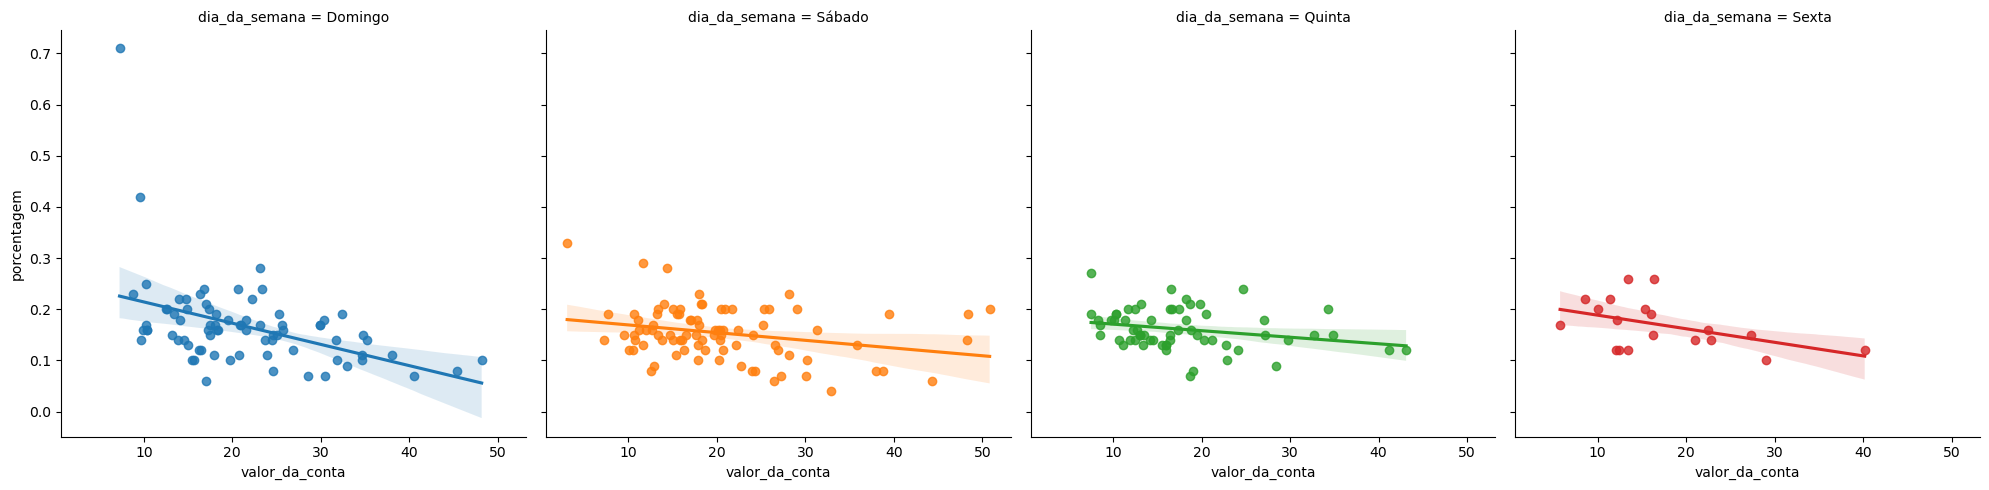

In [148]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', hue = 'dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [149]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [150]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [151]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [152]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

#### A distribuição do valor da conta é igual no sábado e no domingo

#### A distribuição do valor da conta não é igual no sábado e no domingo

In [153]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [154]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [155]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


#### A distribuição do valor da conta é igual no sábado e no domingo

## Análise IV - Hora do dia

In [156]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [157]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

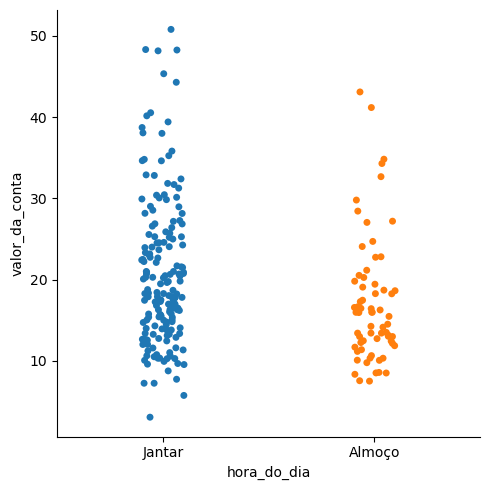

In [158]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

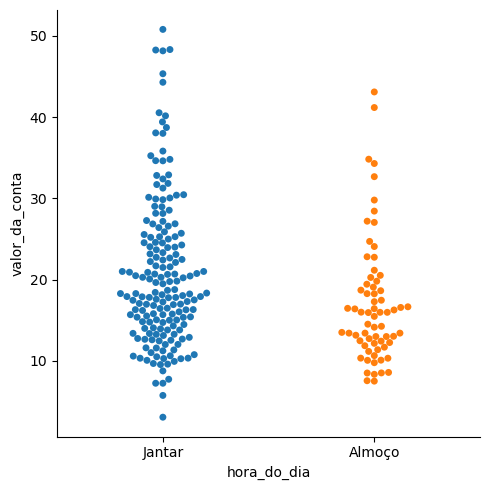

In [159]:
sns.catplot(x = 'hora_do_dia', y = 'valor_da_conta', kind = 'swarm', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

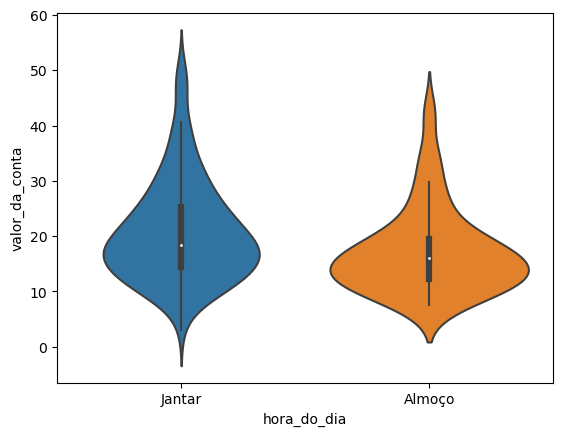

In [160]:
sns.violinplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

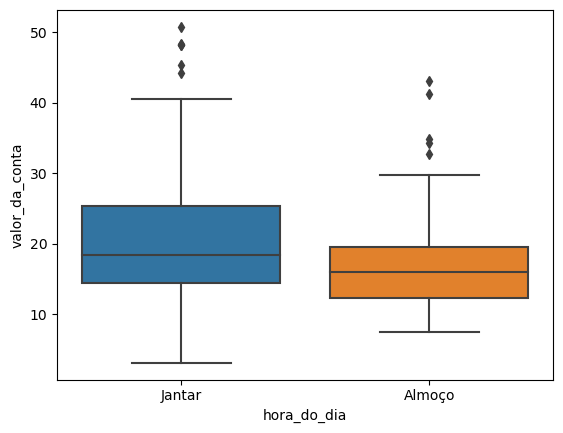

In [161]:
sns.boxplot(x = 'hora_do_dia', y = 'valor_da_conta', data = gorjetas)

In [162]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

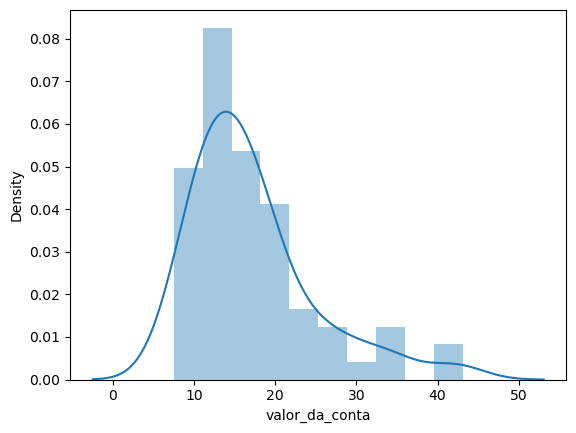

In [163]:
sns.distplot(almoco)

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

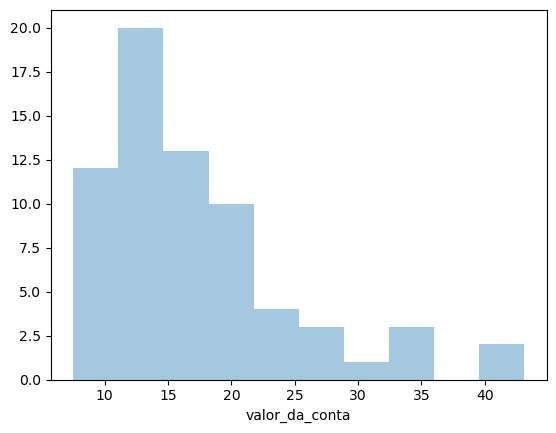

In [164]:
sns.distplot(almoco, kde = False)

In [165]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Density'>

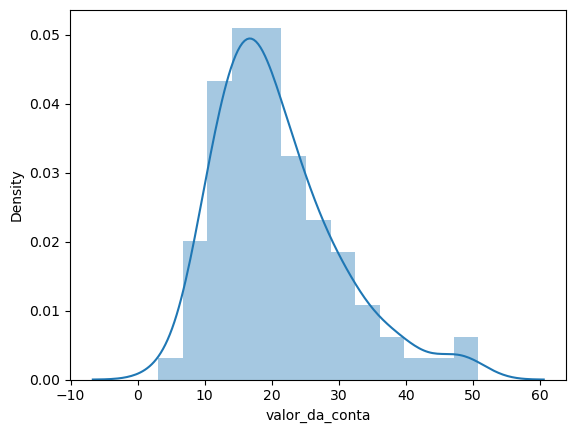

In [166]:
sns.distplot(jantar)

C:\Users\Micaeld\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

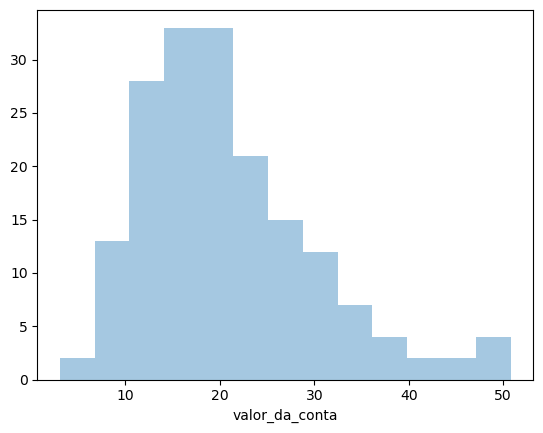

In [167]:
sns.distplot(jantar, kde=False)

In [168]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de hipótese

#### A distribuição do valor da conta é igual no jantar e no almoço

#### A distribuição do valor da conta não é igual no jantar e no almoço

In [169]:
r2 = ranksums(jantar, almoco)

In [170]:
print('O valor do p-value é de {}'.format(r2.pvalue))

O valor do p-value é de 0.0011791039723641672


#### A distribuição do valor da conta não é igual no jantar e no almoço

## Teste de hipótese 2

#### A distribuição da taxa da gorjeta é igual no jantar e no almoço

#### A distribuição da taxa da gorjeta não é igual no jantar e no almoço

In [171]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [172]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [173]:
r3 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [174]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.2602493995587126


#### A distribuição da taxa da gorjeta é igual no jantar e no almoço

In [175]:
_

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773
